In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from sets import Set
import random as rd

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: the sets module is deprecated
  """


In [206]:
class_CBO = np.genfromtxt('class_weight.txt', dtype=None)
#class_CBO = list(class_CBO)

class_History = np.genfromtxt('history_list.txt', dtype=None)
#class_History = list(class_History)

class_combined_factors = []
for i in np.arange(0, class_CBO.shape[0]):
    name = class_CBO[i][1]
    CBO = float(class_CBO[i][2])
    History = float(class_History[i][1])
    total_factor = 0.2*CBO + 0.8*History
    combined_factors = [name, CBO, History, total_factor]
    class_combined_factors.append(combined_factors)
    
dataframe = pd.DataFrame(class_combined_factors, columns=['ClassName', 'ClassCBO', 'ClassHistory', 'TotalScore'])

dataframe.to_csv('TotalScore.csv', index=False, header=False)

print("For maximum TotalScore : ")
print(dataframe.loc[dataframe['TotalScore'] == max(dataframe.TotalScore)])

print("\n\nFor maximum CBO : ")
print(dataframe.loc[dataframe['ClassCBO'] == max(dataframe.ClassCBO)])

print("\n\nFor maximum History : ")
print(dataframe.loc[dataframe['ClassHistory'] == max(dataframe.ClassHistory)])

print("\n\nFor a particular class : ")
print(dataframe.loc[dataframe['ClassName'] == 'HandledContributionItem'])


dataframe.TotalScore.nlargest(n=5)
#print("\n\n")

For maximum TotalScore : 
              ClassName   ClassCBO  ClassHistory  TotalScore
6258  WorkbenchMessages  15.162791    101.492537   84.226588


For maximum CBO : 
     ClassName    ClassCBO  ClassHistory  TotalScore
4788       SWT  100.093023           0.0   20.018605


For maximum History : 
              ClassName   ClassCBO  ClassHistory  TotalScore
6258  WorkbenchMessages  15.162791    101.492537   84.226588


For a particular class : 
                    ClassName  ClassCBO  ClassHistory  TotalScore
2203  HandledContributionItem  5.767442     29.850746   25.034085


6258    84.226588
2449    70.143422
4486    70.090941
6271    68.734745
5230    57.663589
Name: TotalScore, dtype: float64

50
84.2265879899


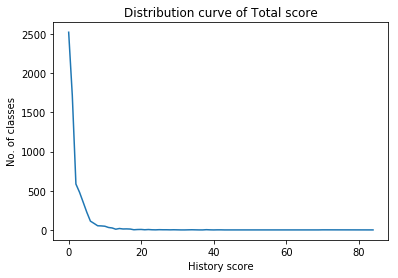

In [199]:
TotalScore, counts = np.unique(ar=(dataframe.TotalScore+0.5).astype(int), return_counts=True)

print(len(TotalScore))

print(max(dataframe.TotalScore))

TotalMtx = zip(TotalScore, counts)

plt.figure(2)
plt.plot(TotalScore, counts)
plt.xlabel('Total score')
plt.ylabel('No. of classes')
plt.title('Distribution curve of Total score')
plt.savefig('dist_totalScore.png')
plt.show()